# Fake Face Detection Using CNN

**Dataset**

https://www.kaggle.com/xhlulu/140k-real-and-fake-faces

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

## Data Preprocessing

In [2]:
dim = (120, 120, 3)
target_size = dim[:2]
batch_size = 128
epochs = 30

### Generating the Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('/content/real_vs_fake/real-vs-fake/train',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/real_vs_fake/real-vs-fake/test',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


### Data Exploration

In [4]:
# Data labels
classes = training_set.class_indices

In [5]:
# Displaying basic data

print('Image Size (Pixels):', target_size)
print('Color Mode:', training_set.color_mode)
print('Training set:', training_set.n, 'images')
print('Test set:', test_set.n, 'images')
print('Classes:', classes)

Image Size (Pixels): (120, 120)
Color Mode: rgb
Training set: 100000 images
Test set: 20000 images
Classes: {'fake': 0, 'real': 1}


In [6]:
encoding = {v: k for k, v in classes.items()}
encoding

{0: 'fake', 1: 'real'}

### Data Visualization

fake: 50000
real: 50000


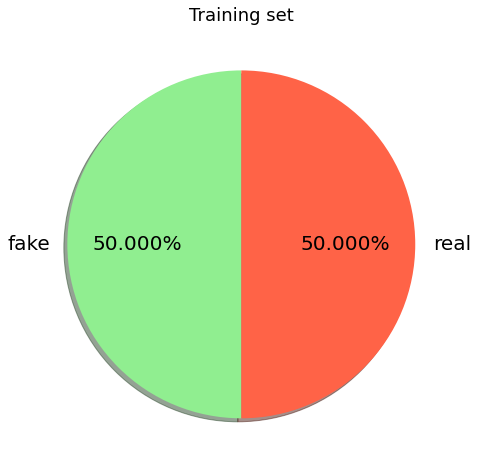

In [7]:
neg = training_set.classes[training_set.classes == 0].shape[0]
pos = training_set.classes[training_set.classes == 1].shape[0]

print(encoding[0], neg, sep=': ')
print(encoding[1], pos, sep=': ')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Training set', size=18)
plt.pie([neg, pos], labels=[encoding[0], encoding[1]], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

fake: 10000
real: 10000


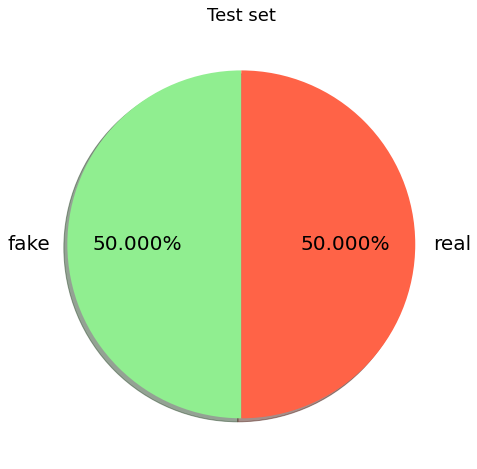

In [8]:
neg = test_set.classes[test_set.classes == 0].shape[0]
pos = test_set.classes[test_set.classes == 1].shape[0]

print(encoding[0], neg, sep=': ')
print(encoding[1], pos, sep=': ')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Test set', size=18)
plt.pie([neg, pos], labels=[encoding[0], encoding[1]], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

In [9]:
# Loading some images
images1, labels1 = test_set[5]
images2, labels2 = test_set[-2]

images = np.concatenate([images1, images2])
labels = np.concatenate([labels1, labels2])

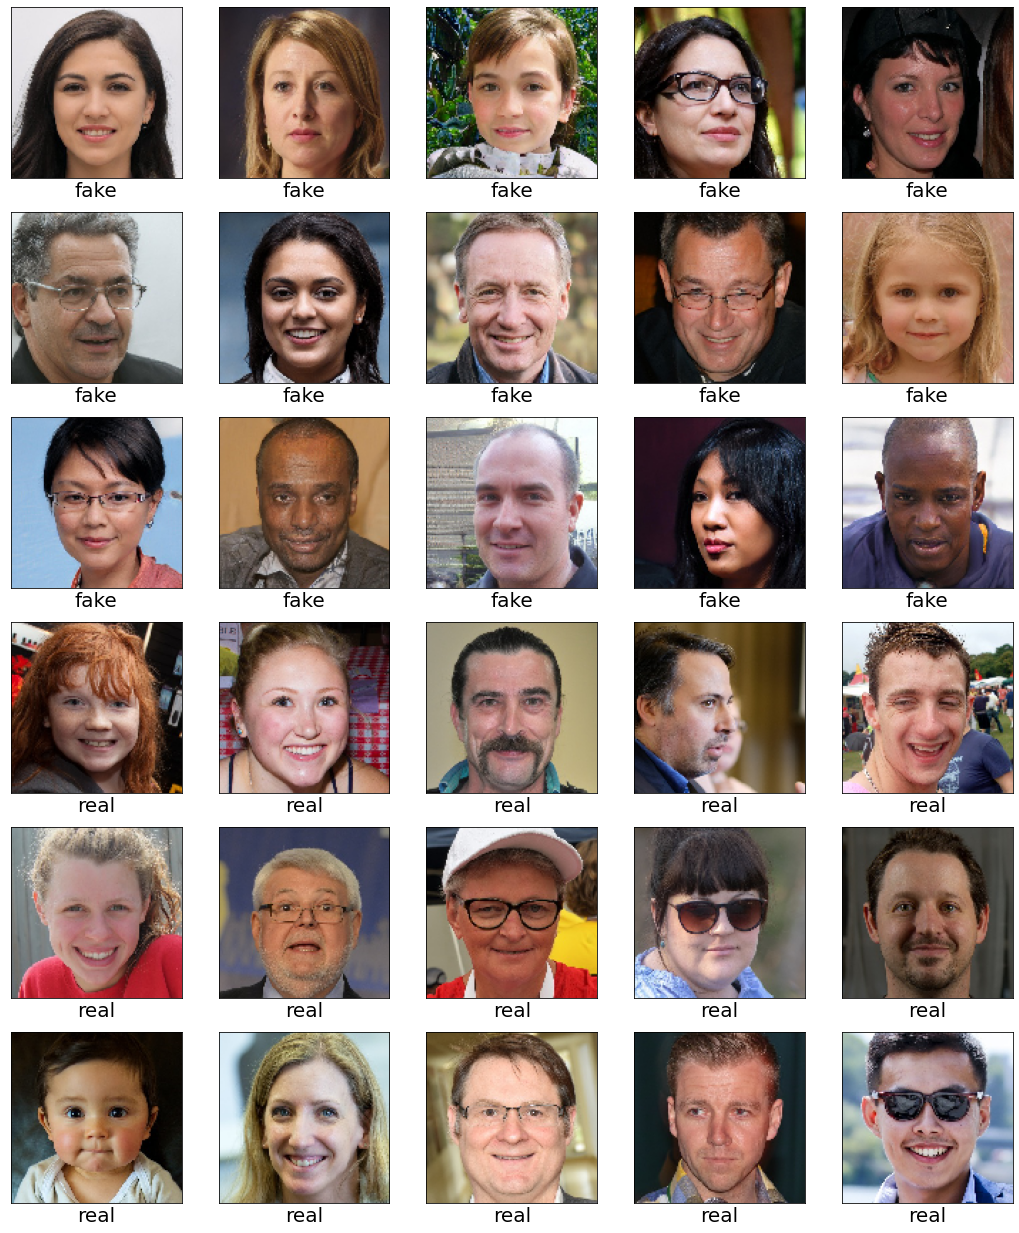

In [10]:
plt.figure(figsize=(18, 22))

j = 1
for i in list(range(15)) + list(range(-15, 0)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    plt.xlabel(encoding[lbl])
    plt.imshow(images[i])

    j += 1
plt.show()

## Building the CNN

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

In [12]:
cnn = Sequential()

cnn.add(Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=64, activation='relu'))

cnn.add(Dense(units=1, activation='sigmoid'))

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [14]:
# Neural Network summary

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = cnn.fit(training_set,
                  validation_data = test_set,
                  epochs = epochs)

Epoch 1/30
782/782 [==============================] - 432s 553ms/step - loss: 0.5553 - accuracy: 0.7073 - val_loss: 0.4609 - val_accuracy: 0.7801
Epoch 2/30
782/782 [==============================] - 432s 552ms/step - loss: 0.4310 - accuracy: 0.8011 - val_loss: 0.4173 - val_accuracy: 0.8102
Epoch 3/30
782/782 [==============================] - 431s 551ms/step - loss: 0.3788 - accuracy: 0.8317 - val_loss: 0.4002 - val_accuracy: 0.8152
Epoch 4/30
782/782 [==============================] - 431s 551ms/step - loss: 0.3421 - accuracy: 0.8506 - val_loss: 0.3352 - val_accuracy: 0.8550
Epoch 5/30
782/782 [==============================] - 430s 550ms/step - loss: 0.3196 - accuracy: 0.8622 - val_loss: 0.2978 - val_accuracy: 0.8722
Epoch 6/30
782/782 [==============================] - 430s 550ms/step - loss: 0.2921 - accuracy: 0.8747 - val_loss: 0.3072 - val_accuracy: 0.8665
Epoch 7/30
782/782 [==============================] - 430s 550ms/step - loss: 0.2758 - accuracy: 0.8828 - val_loss: 0.2670 -

### Model Evaluation

In [16]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
    print('Precision:', precision_score(y_test, y_pred), sep='\t')
    print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
    print('F1:', f1_score(y_test, y_pred), sep='\t\t')
    print('\n')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
    plt.show()

In [17]:
cnn.evaluate(test_set)

157/157 [==============================] - 29s 186ms/step - loss: 0.1572 - accuracy: 0.9373


[0.15721407532691956, 0.937250018119812]

In [18]:
# Predicting the Test set results

y_pred = cnn.predict(test_set, verbose=1) 
y_pred = y_pred > 0.5

157/157 [==============================] - 29s 186ms/step


Accuracy:	0.93725
Precision:	0.9422473955699403
Recall:		0.9316
F1:		0.9368934479810931




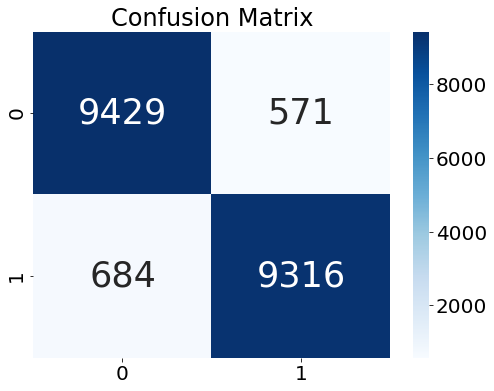

In [19]:
report(test_set.classes, y_pred)

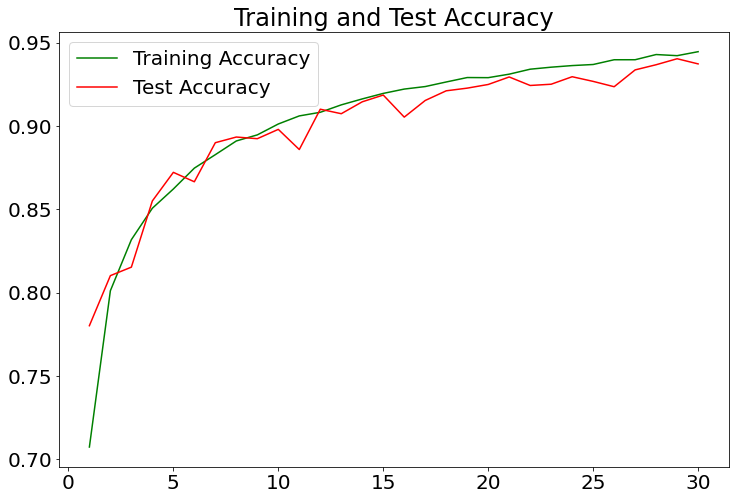

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

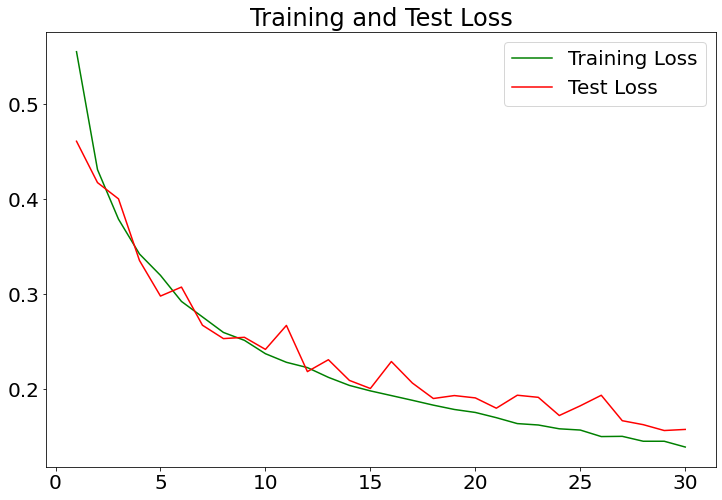

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### More Testing

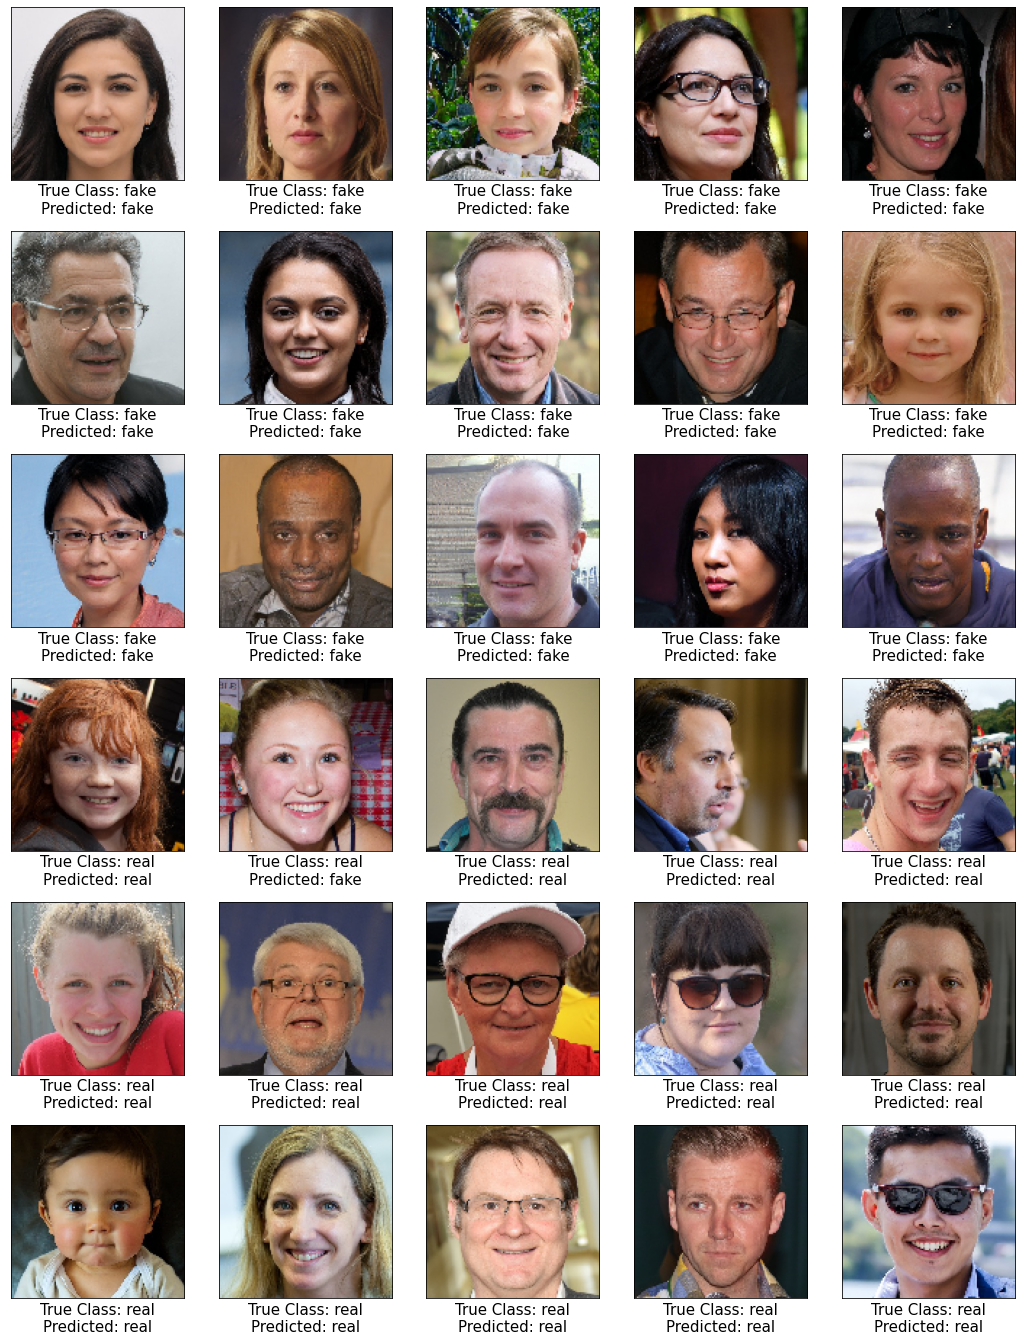

In [22]:
y_sample = cnn.predict (images) > 0.5

import matplotlib
matplotlib.rc('font', size=15)

plt.figure(figsize=(18, 24))

j = 1
for i in list(range(15)) + list(range(-15, 0)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    lbl_pred = int(y_sample[i])
    plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted: ' + str(encoding[lbl_pred]))
    plt.imshow(images[i])

    j += 1
plt.show()

Accuracy:	0.9453125
Precision:	0.9453125
Recall:		0.9453125
F1:		0.9453125




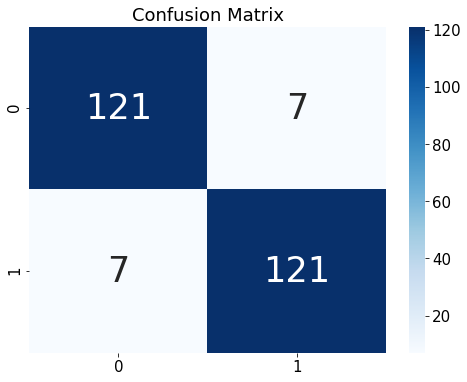

In [23]:
report(labels, y_sample)

### **Validation Set**

Found 20000 images belonging to 2 classes.
157/157 [==============================] - 32s 202ms/step
Accuracy:	0.9411
Precision:	0.9471816707218167
Recall:		0.9343
F1:		0.9406967378171566




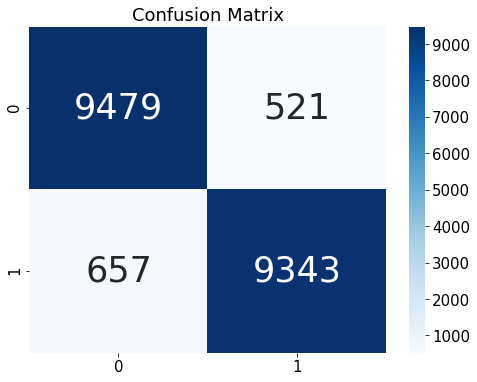

In [26]:
val_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Test set
val_set = val_datagen.flow_from_directory('/content/real_vs_fake/real-vs-fake/valid',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

y_val = cnn.predict(val_set, verbose=1) 
y_val = y_val > 0.5

report(val_set.classes, y_val)

In [25]:
# Saving the model
cnn.save('FakeFaceDetection.h5')